In [1]:
#imported for system and file managing usage
import sys
import numpy as np
import pandas as ps
import tensorflow as tf
import tensorflow.keras.optimizers as opt
from keras.callbacks import ModelCheckpoint

#added to access the modules that placed in sub folder
sys.path.append('./modules')

#added to read special fucntions
from data import *
from plotter import *
from divideData import *
from balanceData import *
from models.gru.gru import *
from models.lstm.lstm import *
from models.rnn.simpleRNN import *


# Define some parameters
EPOCHS = 50
SEQ_LEN = 23
BATCH_SIZE = 256
test_percent = 20
validation_percent = 15
FUTURE_PERIOD_PREDICT = 1



filePath = '/home/cryptocurrency_Forcasting/dataset/Binance_BTCUSDT_1hour.csv'

# Read the data from .csv
data = readData(filePath, FUTURE_PERIOD_PREDICT)

# divide data to train, validation, test sets 
train_data, validation_data, test_data = divide_data(data, validation_percent, test_percent)

# Select equal number of samples with all labels
x_train, y_train = balance_data(train_data, SEQ_LEN, "train")
x_validation, y_validation = balance_data(validation_data, SEQ_LEN, "validation")
x_test, y_test = balance_data(test_data, SEQ_LEN, "test")

# Create the model
model = simpleRNN(x_train)

# Select an optimizer
opt = opt.Adam(learning_rate=0.001, decay=1e-6)

# Compile the model
model.compile(loss='binary_crossentropy',
             optimizer = opt,
             metrics= ['accuracy'])

checkpoint = ModelCheckpoint("models/{}.model".format(f"RNN_Final-{1}"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_validation, y_validation), callbacks= checkpoint)




Epoch 1/50
86/86 [==============================] - 108s 272ms/step - loss: 0.7320 - accuracy: 0.5124 - val_loss: 0.7011 - val_accuracy: 0.5047
Epoch 2/50
86/86 [==============================] - 19s 218ms/step - loss: 0.6937 - accuracy: 0.5286 - val_loss: 0.7075 - val_accuracy: 0.5058
Epoch 3/50
86/86 [==============================] - 15s 179ms/step - loss: 0.6556 - accuracy: 0.5755 - val_loss: 0.7178 - val_accuracy: 0.5000
Epoch 4/50
86/86 [==============================] - 16s 185ms/step - loss: 0.6526 - accuracy: 0.5737 - val_loss: 0.7023 - val_accuracy: 0.5058
Epoch 5/50
86/86 [==============================] - 15s 180ms/step - loss: 0.6403 - accuracy: 0.5827 - val_loss: 0.7051 - val_accuracy: 0.4995
Epoch 6/50
86/86 [==============================] - 16s 181ms/step - loss: 0.6327 - accuracy: 0.5902 - val_loss: 0.7096 - val_accuracy: 0.5057
Epoch 7/50
86/86 [==============================] - 16s 188ms/step - loss: 0.6392 - accuracy: 0.5867 - val_loss: 0.7030 - val_accuracy: 0.500

Epoch 38/50
86/86 [==============================] - 17s 203ms/step - loss: 0.6175 - accuracy: 0.5995 - val_loss: 0.7024 - val_accuracy: 0.5042
Epoch 39/50
86/86 [==============================] - 19s 217ms/step - loss: 0.6163 - accuracy: 0.6035 - val_loss: 0.7003 - val_accuracy: 0.4951
Epoch 40/50
86/86 [==============================] - 16s 187ms/step - loss: 0.6182 - accuracy: 0.6012 - val_loss: 0.7086 - val_accuracy: 0.4998
Epoch 41/50
86/86 [==============================] - 16s 184ms/step - loss: 0.6189 - accuracy: 0.6006 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 42/50
86/86 [==============================] - 16s 181ms/step - loss: 0.6173 - accuracy: 0.6047 - val_loss: 0.7006 - val_accuracy: 0.5002
Epoch 43/50
86/86 [==============================] - 16s 184ms/step - loss: 0.6196 - accuracy: 0.5974 - val_loss: 0.7065 - val_accuracy: 0.5031
Epoch 44/50
86/86 [==============================] - 16s 181ms/step - loss: 0.6188 - accuracy: 0.5945 - val_loss: 0.7047 - val_accuracy:

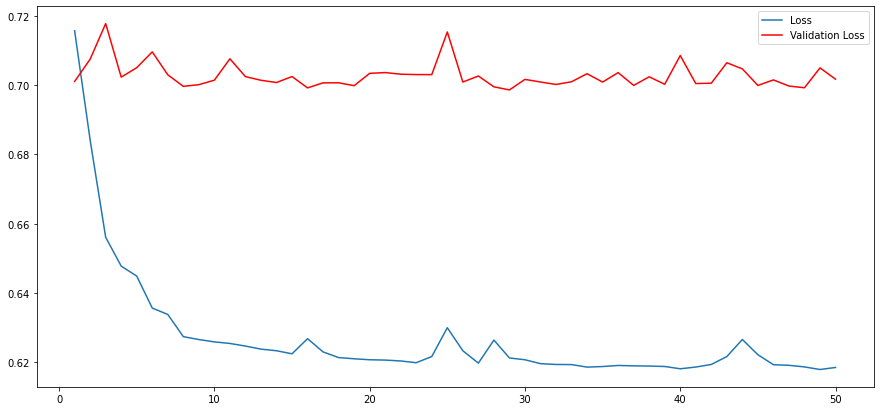

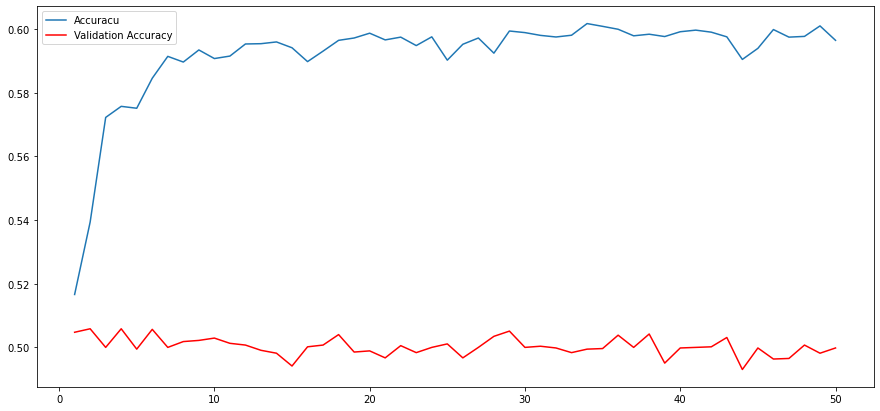

In [2]:
# Plot the model's accuracy and loss
p = plotter(history)

In [3]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions:")
predictions = model.predict(x_test[:3])
print(predictions)
print("Real targets:")
print(y_test[:3])



Evaluate on test data
58/58 [==============================] - 2s 38ms/step - loss: 0.6997 - accuracy: 0.5130
test loss, test acc: [0.6997061967849731, 0.5130470395088196]
Generate predictions:
[[0.54625034]
 [0.49746066]
 [0.5650516 ]]
Real targets:
[1. 0. 1.]


In [4]:
test_file = '/home/cryptocurrency_Forcasting/dataset/BINANCE_BTCUSDT_60_min_test.csv'

# Read the data from .csv
data = readData(test_file, FUTURE_PERIOD_PREDICT)
x_test, y_test = balance_data(data, SEQ_LEN, "test")


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions:")
predictions = model.predict(x_test[:10])
print(predictions)
print("Real targets:")
print(y_test[:10])



Evaluate on test data
3/3 [==============================] - 0s 34ms/step - loss: 1.1665 - accuracy: 0.5560
test loss, test acc: [1.1665191650390625, 0.5559566617012024]
Generate predictions:
[[0.55971426]
 [0.04518422]
 [0.08480874]
 [0.39851993]
 [0.00730103]
 [0.41525486]
 [0.03696293]
 [0.50588423]
 [0.03223914]
 [0.34216362]]
Real targets:
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
